##  Confidence Intervals – Explained with Basketball Player Heights

Let's explain **confidence intervals**, **sample vs population**, and **t-scores** — all using the **basketball player height** example.


### Why Do We Need Confidence Intervals?

In statistics, we often want to know **parameters** of an entire population, like:

* The **mean** height of all NBA basketball players
* The **variance/covariance** of their heights, weights, etc.

However, we usually **don’t have access to the entire population**, so we take a **sample** from it. For example, instead of measuring **every** professional basketball player in the world, we might just measure a few.

But here's the key point:

> **The sample mean will almost never be exactly equal to the true population mean.**
> Different samples from the same population will yield slightly different results.

So, what can we do?

**We construct a range — a confidence interval — that we believe contains the true population mean.**

---

##  Example: Estimating the Average Height of Basketball Players

Let’s say we randomly sample **10** professional basketball players and record their heights (in centimeters):

```
[202, 198, 210, 205, 200, 208, 199, 203, 206, 207]
```

---

###  Step 1: Calculate Sample Statistics

We treat this as our sample from the population.

* **Sample Mean ($\bar{x}$)**:

  $$
  \bar{x} = \frac{202 + 198 + \cdots + 207}{10} = 203.8 \text{ cm}
  $$

* **Sample Standard Deviation (s)** ≈ 4.1 cm

* **Sample Size (n)** = 10

---

###  Step 2: Understanding the Confidence Interval

We want to compute a **95% confidence interval** for the true mean height of all professional basketball players.

This means:

> *We want a range of values that has a 95% chance of containing the true mean height.*

This interval is given by:

$$
\text{CI} = \bar{x} \pm t^* \cdot \frac{s}{\sqrt{n}}
$$

---

##  What Is the t-Score?

When estimating a population mean from a small sample (typically $n < 30$), we don't use the standard normal (Z) distribution. Instead, we use the **Student’s t-distribution** — which is wider to account for more uncertainty with small samples.

* The **t-score** ($t^*$) is a **multiplier** that determines how wide the confidence interval should be, based on:

  * The **desired confidence level** (e.g., 95%)
  * The **degrees of freedom (df)**, which is $n - 1$

> 🔹 The t-score tells you how many **standard errors** you need to go above and below the sample mean to capture the true mean with your desired confidence.

To find the t-score:

* Use a t-table or calculator.
* For $n = 10$, degrees of freedom = 9
* For 95% confidence:

  $$
  t^* ≈ 2.262
  $$

---

###  Step 3: Calculate the Margin of Error

$$
\frac{s}{\sqrt{n}} = \frac{4.1}{\sqrt{10}} ≈ 1.30
$$

$$
\text{Margin of Error} = 2.262 \cdot 1.30 ≈ 2.94
$$

---

###  Final 95% Confidence Interval:

$$
\text{CI} = 203.8 \pm 2.94 = (200.86 \text{ cm}, 206.74 \text{ cm})
$$

### 🗣️ Interpretation:

> Based on this sample, we are 95% confident that the **true average height** of all professional basketball players is **between 200.86 cm and 206.74 cm**.

---

###  Why This Matters: Sampling Variability

If you repeated this experiment many times — took many samples of 10 players — each sample would give a slightly different mean. But **95% of those intervals would capture the true mean**.

So, the confidence interval accounts for this **uncertainty** due to **sampling variation**.

---

##  Summary

| Term                                      | Meaning                                                             |
| ----------------------------------------- | ------------------------------------------------------------------- |
| **Sample Mean** ($\bar{x}$)               | Your best estimate of the population mean                           |
| **Standard Deviation (s)**                | How spread out your sample is                                       |
| **Standard Error** ($\frac{s}{\sqrt{n}}$) | How much the sample mean is expected to vary                        |
| **t-score**                               | A value from the t-distribution that adjusts for small sample sizes |
| **Confidence Interval**                   | A range where the population mean likely lies, based on your sample |

---

When your data is **multidimensional**, instead of estimating a single mean and standard deviation, you're estimating:

* A **mean vector** $\boldsymbol{\mu} \in \mathbb{R}^d$
* A **covariance matrix** $\boldsymbol{\Sigma} \in \mathbb{R}^{d \times d}$

And confidence intervals generalize into **confidence regions (ellipses or ellipsoids)**.

---

##  Theoretical Background

Let’s say your data $X = \{x_1, x_2, ..., x_n\}$ consists of $n$ samples in $\mathbb{R}^d$.

###  1. Sample Mean Vector

$$
\boldsymbol{\bar{x}} = \frac{1}{n} \sum_{i=1}^n x_i
$$

###  2. Sample Covariance Matrix

$$
\mathbf{S} = \frac{1}{n - 1} \sum_{i=1}^n (x_i - \boldsymbol{\bar{x}})(x_i - \boldsymbol{\bar{x}})^T
$$

---

##  Confidence Region Equation (Multivariate Case)

For multivariate normal data, the confidence region for the **true mean vector** $\boldsymbol{\mu}$ is defined by:

$$
(\boldsymbol{\bar{x}} - \boldsymbol{\mu})^T \mathbf{S}^{-1} (\boldsymbol{\bar{x}} - \boldsymbol{\mu}) \leq \frac{d(n - 1)}{n - d} \cdot F_{d, n - d}(1 - \alpha)
$$

Where:

* $F_{d, n-d}(1 - \alpha)$ is the **critical value** from the **F-distribution**
* $d$ is the number of dimensions
* $\alpha$ is the significance level (e.g., 0.05 for 95% confidence)
* The left-hand side is a **Mahalanobis distance** between the sample mean and the true mean

For **2D**, this region is an **ellipse**. For **3D or higher**, it's an **ellipsoid**.

---

##  Example (2D): Height vs Weight

Let's simulate 2D data for **height (cm)** and **weight (kg)** of basketball players and plot the 95% confidence ellipse for the **mean vector**.



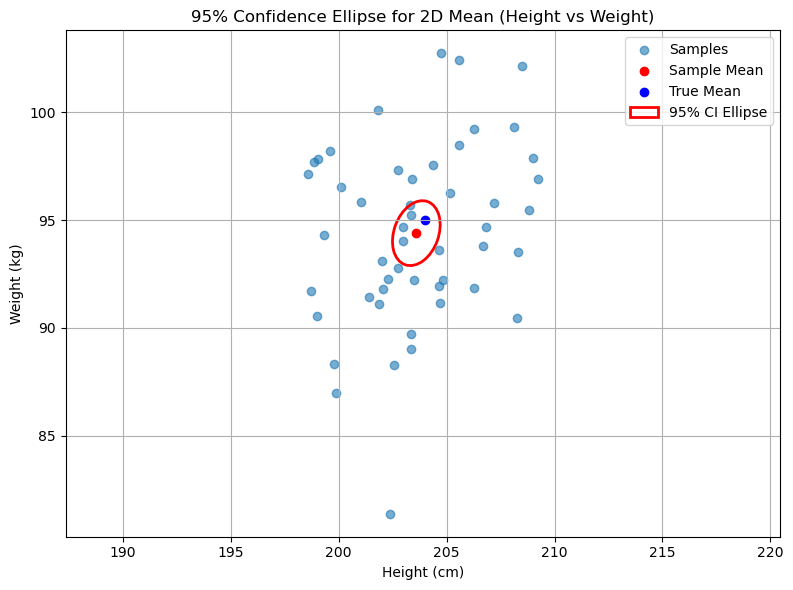

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f
from matplotlib.patches import Ellipse

# Simulate 2D data: height (cm), weight (kg)
np.random.seed(42)
mean_true = np.array([204, 95])  # true population mean
cov_true = np.array([[10, 5], [5, 25]])  # some realistic correlation
data = np.random.multivariate_normal(mean_true, cov_true, size=50)

# Sample mean and covariance
n, d = data.shape
mean_sample = np.mean(data, axis=0)
cov_sample = np.cov(data, rowvar=False)

# Confidence level and critical value
alpha = 0.05  # for 95% confidence
f_critical = f.ppf(1 - alpha, d, n - d)
scale = d * (n - 1) / (n - d) * f_critical

# Eigen-decomposition for ellipse
eigvals, eigvecs = np.linalg.eigh(cov_sample)
order = eigvals.argsort()[::-1]
eigvals = eigvals[order]
eigvecs = eigvecs[:, order]

# Get width and height of ellipse (scaled by sqrt of eigenvalues)
width, height = 2 * np.sqrt(eigvals * scale / n)
angle = np.degrees(np.arctan2(*eigvecs[:, 0][::-1]))

# Plot data points and confidence ellipse
plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], alpha=0.6, label="Samples")
plt.scatter(*mean_sample, color='red', label='Sample Mean')
plt.scatter(*mean_true, color='blue', label='True Mean')

ellipse = Ellipse(xy=mean_sample, width=width, height=height,
                  angle=angle, edgecolor='red', fc='None', lw=2, label='95% CI Ellipse')
plt.gca().add_patch(ellipse)

plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.title('95% Confidence Ellipse for 2D Mean (Height vs Weight)')
plt.grid(True)
plt.legend()
plt.axis('equal')
plt.tight_layout()
plt.show()


* The **red ellipse** is the **95% confidence region** for the true 2D mean.
* The **red dot** is the **sample mean**.
* The **blue dot** is the **true mean**.
* Most likely, the **true mean lies inside the ellipse** — with 95% confidence.

# Confidence Interval

In statistics parameters of data (for instance mean and covariance) are often estimated based on sample from data (since you do not have the entire data, for instance, the height of an entire country), but the mean (or other parameters) of the sample might be slightly different from the actual mean of data, so if you make several samples each sample might show a slightly different value for the mean, so now we are looking for a range in which the actual mean lays with a certain probability. This range called **Confidence Interval**.  The confidence level of $95 \%$ or $99 \%$ is often used as probability, meaning if a confidence interval of $99 \%$ is given, one can be $99 \%$ certain that the true values lie within this interval.

## Confidence Interval for Data with Normal Distribution

1. **Sample mean ($\bar{x}$)**: The average value of the sample data.
2. **Z-score or t-score**: A value from the Z or t distribution that corresponds to the desired confidence level. For example, a 95% confidence level corresponds to a Z-score of approximately 1.96 (for large sample sizes or known population standard deviation) or a t-score from the t-distribution for smaller samples with unknown population standard deviation.
3. **Standard deviation ($\sigma$) or Standard error of the mean (SEM)**: The SEM is calculated as $\sigma/\sqrt{n}$ where $\sigma$ is the population standard deviation and $n$ is the sample size. If the population standard deviation is unknown, it is estimated using the sample standard deviation ($s$).
4. **Sample size ($n$)**: The number of observations in the sample.

The formula for a CI around a sample mean, when the population standard deviation is known, is given by:

$ \text{CI} = \bar{x} \pm Z \times \frac{\sigma}{\sqrt{n}} $

where:
- $\bar{x}$ is the sample mean,
- $Z$ is the Z-score corresponding to the desired confidence level,
- $\sigma$ is the population standard deviation, and
- $n$ is the sample size.



The Z-score, also known as a standard score, measures the number of standard deviations an individual data point is from the mean of a dataset. It's a way to compare results from different data sets or to standardize scores across different scales. The formula to calculate a Z-score for a given data point is:

$ Z = \frac{(X - \mu)}{\sigma} $

Where:
- $Z$ is the Z-score.
- $X$ is the value of the data point.
- $\mu$ is the mean of the dataset.
- $\sigma$ is the standard deviation of the dataset.

### Steps to Calculate a Z-score:

1. **Calculate the mean ($\mu$) of the dataset:** Add up all the numbers, then divide by the number of numbers.
2. **Calculate the standard deviation ($\sigma$) of the dataset:** This measures the dispersion of the dataset. The formula for the sample standard deviation is:
$ \sigma = \sqrt{\frac{\sum (X_i - \mu)^2}{n-1}} $
   Where $X_i$ are the data points, $\mu$ is the mean of the dataset, and $n$ is the number of data points.
3. **Calculate the Z-score ($Z$) for each data point:** Subtract the mean from the data point, and then divide this by the standard deviation.

### Example:

Let's say we have a test score of 85 from a class where the mean test score is 80 and the standard deviation is 5.

$ Z = \frac{(85 - 80)}{5} = \frac{5}{5} = 1 $

This means the test score of 85 is 1 standard deviation above the mean of the class scores.

### Interpretation:

- A Z-score of 0 indicates the score is exactly at the mean.
- A positive Z-score indicates the score is above the mean, and a negative Z-score indicates it is below the mean.
- The magnitude of the Z-score shows how far from the mean the data point is in terms of standard deviations. For example, a Z-score of 2 means the data point is 2 standard deviations away from the mean.



To understand how a $95 \%$ confidence level corresponds to a Z-score of approximately $1.96$, it's important to dive into the concept of normal distribution and the properties of Z-scores.

A Z-score measures how many standard deviations an element is from the mean. In the context of confidence intervals, the Z-score indicates how far we must go from the mean of a distribution to capture a certain proportion of the data.

### Normal Distribution

A normal distribution is a symmetric, bell-shaped distribution where most of the observations cluster around the central peak and the probabilities for values further away from the mean taper off equally in both directions. Key characteristics include:

- It is defined by its mean ($\mu$) and standard deviation ($\sigma$).
- Approximately 68% of the data falls within one standard deviation of the mean.
- Approximately 95% of the data falls within two standard deviations of the mean.
- Approximately 99.7% of the data falls within three standard deviations of the mean.

However, these percentages (68%, 95%, 99.7%) are approximations. For precise calculations, especially for creating confidence intervals, we use the Z-score to determine the exact cutoff points.

### Calculating the Z-score for a 95% Confidence Level

The 95% confidence level refers to the percentage of all possible samples that can be expected to include the true population parameter. To find the Z-score that corresponds to the middle 95% of the distribution, we look at the properties of the normal distribution:

- The middle 95% is centered around the mean, leaving 2.5% of the observations in each tail of the distribution (100% - 95% = 5%, divided by 2 because it's symmetric).
- A Z-score table or the inverse of the standard normal distribution function (often denoted as $Z_{\alpha/2}$ or $Z_{0.025}$ for a 95% confidence interval) can be used to find the Z-score that corresponds to the cumulative area of 0.975 (100% - 2.5% = 97.5%) from the left side of the mean.

When we look up this cumulative area in a Z-score table or use a statistical software or calculator to find the inverse of the standard normal distribution, we find that the Z-score that leaves 2.5% in the upper tail (or captures 97.5% of the data from the left) is approximately 1.96.

This means that to create a 95% confidence interval for the mean of a normally distributed dataset, we would use a Z-score of 1.96 to calculate the margin of error, extending 1.96 standard deviations from the sample mean to the left and right. This captures the central 95% of the possible sample means.



## Numerical Example for Confidence Interval

Let's calculate a 95% confidence interval for the mean of a sample with the following characteristics:
- Sample mean ($\bar{x}$) = 100
- Population standard deviation ($\sigma$) = 15
- Sample size ($n$) = 25

The Z-score for a $95\%$ confidence level is approximately $1.96$.

We'll calculate the confidence interval using the formula provided.

Let's calculate it:

The $95 \%$ confidence interval for the mean of this sample is approximately from $94.12$ to $105.88$. This means we are $95 \% $confident that the true population mean falls within this range. The margin of error in this case is $5.88$, indicating the range above and below the sample mean that comprises the confidence interval.

To interpret this, if you were to take many samples and calculate a $95 \%$ confidence interval for each, about 95% of these intervals would contain the true population mean.

In [1]:
# Given values
sample_mean = 100  # Sample mean (x̄)
population_std_dev = 15  # Population standard deviation (σ)
sample_size = 25  # Sample size (n)
confidence_level_z_score = 1.96  # Z-score for 95% confidence level

# Calculating the Standard Error of the Mean (SEM)
sem = population_std_dev / (sample_size**0.5)

# Calculating the margin of error
margin_of_error = confidence_level_z_score * sem

# Calculating the confidence interval
lower_bound = sample_mean - margin_of_error
upper_bound = sample_mean + margin_of_error

(lower_bound, upper_bound, margin_of_error)


(94.12, 105.88, 5.88)